In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [42]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9484,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df.shape

(42000, 785)

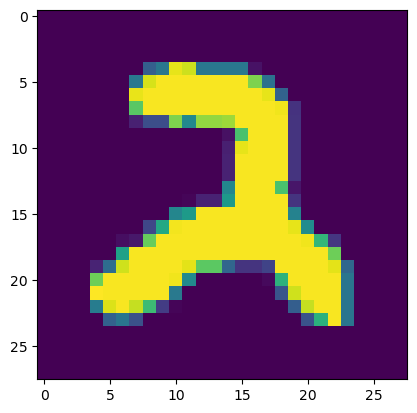

In [44]:
# Plotting '37891' row

import matplotlib.pyplot as plt

plt.imshow(df.iloc[37891,1:].values.reshape(28,28))
plt.show()

#### Applying KNN Algo

In [45]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
X_train.shape

(33600, 784)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier()

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
# finding prediction & prediction execution time

import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

14.543730974197388


In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

#### Applying PCA --> To reduce number of columns

In [53]:
# 1 Standardizing our data i.e., doing mean centring

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
# 2 Applying PCA 

from sklearn.decomposition import PCA
# n_components=200 --> how many principle component we want
pca = PCA(n_components=200)

In [56]:
# 3 In this step we are finding Eigen Vectors & Eigen Values and shifting our data into that new coordinate.

# The 'fit_transform' method fits the PCA model to the data and then performs the dimensionality reduction.
X_train_trf = pca.fit_transform(X_train)
# The 'transform' method applies the dimensionality reduction using the already fitted PCA model (trained on the training data). 
X_test_trf = pca.transform(X_test)

In [57]:
X_train_trf.shape

(33600, 200)

#### Applying KNN with less input cols

In [58]:
knn = KNeighborsClassifier()

In [59]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [60]:
y_pred = knn.predict(X_test_trf)

In [61]:
accuracy_score(y_test,y_pred)

0.9502380952380952

In [62]:
# # Code tells that if Principle component is increasing our accuracy score is also increasing

# accuracyscore = []

# for i in range(1,785):
#     pca = PCA(n_components=i)
#     X_train_trf = pca.fit_transform(X_train)
#     X_test_trf = pca.transform(X_test)
    
#     knn = KNeighborsClassifier()
    
#     knn.fit(X_train_trf,y_train)
#     y_pred = knn.predict(X_test_trf)
    
#     accuracyscore.append(accuracy_score(y_test,y_pred))
    
# print(accuracyscore)

#### Visualizing Data in 2D

In [63]:
# transforming to a 2D coordinate system

pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [64]:
X_train_trf

array([[-2.71868383, -0.49094712],
       [-0.67683544, -6.75077141],
       [-3.03324196,  6.50989092],
       ...,
       [ 2.1489541 ,  0.78342993],
       [ 1.05947097,  0.94561176],
       [17.70260291,  1.96240404]])

In [65]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

#### Visualizing Data in 3D

In [66]:
# transforming in 3D

pca = PCA(n_components=3)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [67]:
X_train_trf

array([[-2.71862213, -0.48976918,  1.13549413],
       [-0.67704096, -6.75352348, -2.3354215 ],
       [-3.03322966,  6.50964534,  7.49191679],
       ...,
       [ 2.14884288,  0.78110159, -0.74745046],
       [ 1.05961607,  0.9480094 ,  3.94916345],
       [17.70259899,  1.96221693, -4.94415884]])

In [68]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [69]:
# Eigen values

pca.explained_variance_

array([40.67111198, 29.17023388, 26.74459604])

In [70]:
# 3-Eigen-Vectors in 784-D space

pca.components_

array([[ 2.97433802e-17,  8.88525542e-19, -4.81740369e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.07608033e-17, -1.42152920e-17,  2.24699896e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.19245352e-16, -3.63332424e-18,  1.37391547e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [71]:
pca.components_.shape

(3, 784)

#### Finding optimum number of Principle component

In [72]:
# Eigen Value in percentage tells how much corresponding Eigen Vector Explain Variance.

pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [73]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [74]:
pca.explained_variance_.shape

(784,)

In [75]:
pca.components_.shape

(784, 784)

In [76]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

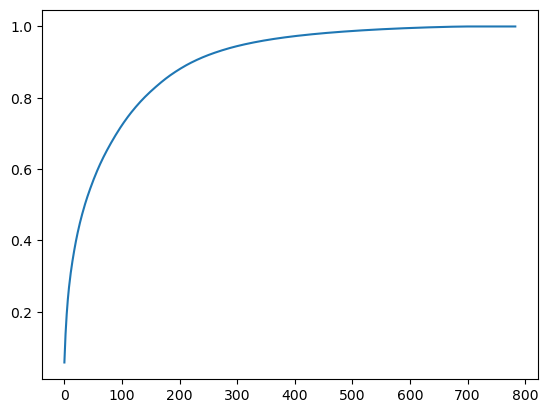

In [78]:
# Plotting graph of above cumulative sum

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

##### from above plot, I can say that from 200 principle component i am explaining my 90% variance of original data.